# Exploratory Data Analysis

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [65]:
df = pd.read_csv('database.csv')
df.head()

,Player,Team,#,Nation,Position,Age,Minutes,Goals,Assists,Penalty Shoot on Goal,...,Goal-Creating Actions,Passes Completed,Passes Attempted,Pass Completion %,Progressive Passes,Carries,Progressive Carries,Dribble Attempts,Successful Dribbles,Date
0,Bruno Fernandes,Manchester United,8,POR,"FW,AM",29-343,90,0,0,0,...,0,43,60,"71,7",6,50,7,1,1,2024-08-16
1,Marcus Rashford,Manchester United,10,ENG,LW,26-290,90,0,0,0,...,0,22,30,"73,3",2,34,2,6,0,2024-08-16
2,Amad Diallo,Manchester United,16,CIV,RW,22-036,60,0,0,0,...,0,28,33,"84,8",1,22,0,1,1,2024-08-16
3,Alejandro Garnacho,Manchester United,17,ARG,RW,20-046,30,0,1,0,...,1,10,11,"90,9",0,11,2,2,0,2024-08-16
4,Mason Mount,Manchester United,7,ENG,AM,25-219,60,0,0,0,...,0,11,15,"73,3",1,16,0,2,0,2024-08-16


In [66]:
df.shape

(3349, 33)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3349 entries, 0 to 3348
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Player                  3349 non-null   object 
 1   Team                    3349 non-null   object 
 2   #                       3349 non-null   int64  
 3   Nation                  3349 non-null   object 
 4   Position                3349 non-null   object 
 5   Age                     3349 non-null   object 
 6   Minutes                 3349 non-null   int64  
 7   Goals                   3349 non-null   int64  
 8   Assists                 3349 non-null   int64  
 9   Penalty Shoot on Goal   3349 non-null   int64  
 10  Penalty Shoot           3349 non-null   int64  
 11  Total Shoot             3349 non-null   int64  
 12  Shoot on Target         3349 non-null   int64  
 13  Yellow Cards            3349 non-null   int64  
 14  Red Cards               3349 non-null   

- `26  Pass Completion %       3311 non-null   object`
  - Some null rows in Pass Completion need to be handled

In [68]:
# Convert Age to float
# Original format is YY-DDD 

df[['AgeYears', 'AgeDays']] = df['Age'].str.split('-', expand=True)

df['AgeYears'] = pd.to_numeric(df['AgeYears'], errors='coerce')
df['AgeDays'] = pd.to_numeric(df['AgeDays'], errors='coerce')

df.drop('Age', axis=1, inplace=True)

df["Age"] = df['AgeYears'] + (df['AgeDays'] / 365)

df.drop('AgeYears', axis=1, inplace=True)
df.drop('AgeDays', axis=1, inplace=True)

df["Age"].head()

0    29.939726
1    26.794521
2    22.098630
3    20.126027
4    25.600000
Name: Age, dtype: float64

In [69]:
# Cleaning Pass Completion % 
df['Pass Completion %'] = df['Pass Completion %'].str.replace(',', '.', regex=False)
df['Pass Completion %'] = pd.to_numeric(df['Pass Completion %'], errors='coerce')

df['Pass Completion %'].value_counts()

100.0    199
80.0     105
75.0     104
50.0      99
66.7      97
        ... 
95.1       1
90.8       1
52.8       1
97.6       1
57.8       1
Name: Pass Completion %, Length: 386, dtype: int64

### Handling Null Values

In [70]:
df.isnull().sum()

Player                     0
Team                       0
#                          0
Nation                     0
Position                   0
Minutes                    0
Goals                      0
Assists                    0
Penalty Shoot on Goal      0
Penalty Shoot              0
Total Shoot                0
Shoot on Target            0
Yellow Cards               0
Red Cards                  0
Touches                    0
Dribbles                   0
Tackles                    0
Blocks                     0
Expected Goals (xG)        0
Non-Penalty xG (npxG)      0
Expected Assists (xAG)     0
Shot-Creating Actions      0
Goal-Creating Actions      0
Passes Completed           0
Passes Attempted           0
Pass Completion %         38
Progressive Passes         0
Carries                    0
Progressive Carries        0
Dribble Attempts           0
Successful Dribbles        0
Date                       0
Age                        0
dtype: int64

In [71]:
null_rows = df[df['Pass Completion %'].isnull()]
null_rows

,Player,Team,#,Nation,Position,Minutes,Goals,Assists,Penalty Shoot on Goal,Penalty Shoot,...,Passes Completed,Passes Attempted,Pass Completion %,Progressive Passes,Carries,Progressive Carries,Dribble Attempts,Successful Dribbles,Date,Age
24,Jay Stansfield,Fulham,28,ENG,"AM,DM",1,0,0,0,0,...,0,0,NaN,0,0,0,0,0,2024-08-16,21.728767
356,Beto,Everton,14,GNB,FW,19,0,0,0,0,...,0,0,NaN,0,2,1,0,0,2024-08-24,26.564384
417,Jean-Clair Todibo,West Ham United,25,FRA,CB,2,0,0,0,0,...,0,0,NaN,0,0,0,0,0,2024-08-24,24.652055
447,Ali Al Hamadi,Ipswich Town,16,IRQ,FW,8,0,0,0,0,...,0,0,NaN,0,0,0,0,0,2024-08-24,22.482192
514,Reiss Nelson,Arsenal,24,ENG,RW,3,0,0,0,0,...,0,0,NaN,0,1,0,0,0,2024-08-24,24.706849
527,Daniel Jebbison,Bournemouth,21,ENG,FW,6,0,0,0,0,...,0,0,NaN,0,0,0,0,0,2024-08-25,21.032877
538,Adam Smith,Bournemouth,15,ENG,RB,5,0,0,0,0,...,0,0,NaN,0,0,0,0,0,2024-08-25,33.323288
717,Taiwo Awoniyi,Nottingham Forest,9,NGA,DM,1,0,0,0,0,...,0,0,NaN,0,0,0,0,0,2024-08-31,27.052055
764,Harrison Reed,Fulham,6,ENG,DM,4,0,0,0,0,...,0,0,NaN,0,0,0,0,0,2024-08-31,29.594521
837,Miguel Almirón,Newcastle United,24,PAR,LW,1,0,0,0,0,...,0,0,NaN,0,0,0,0,0,2024-09-01,30.558904


In [72]:
# Calculate the median Pass Completion % for each position
position_medians = df.groupby('Position')['Pass Completion %'].median()

# Function to prioritize a player's past data for imputing missing Pass Completion %
def impute_pass_completion(row):
    if pd.isnull(row['Pass Completion %']):
        # Filter past data for the same player
        past_data = df[(df['Player'] == row['Player']) & ~df['Pass Completion %'].isnull()]
        if not past_data.empty:
            # Use the median of the player's past performances
            return past_data['Pass Completion %'].median()
        else:
            # Fallback to the median for the player's position
            return position_medians[row['Position']]
    return row['Pass Completion %']

# Apply the imputation logic
df['Pass Completion %'] = df.apply(impute_pass_completion, axis=1)

# Verify there are no missing values
final_missing_values = df['Pass Completion %'].isnull().sum()

# Display a sample of the cleaned dataset
cleaned_sample = df[['Player', 'Position', 'Pass Completion %']].head()

print("Missing Values After Final Imputation:", final_missing_values)
print(cleaned_sample)

Missing Values After Final Imputation: 0
               Player Position  Pass Completion %
0     Bruno Fernandes    FW,AM               71.7
1     Marcus Rashford       LW               73.3
2         Amad Diallo       RW               84.8
3  Alejandro Garnacho       RW               90.9
4         Mason Mount       AM               73.3


In [73]:
# Convert "Date" to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Reference date (earliest match date)
reference_date = df['Date'].min()

# Calculate days since the reference date
df['Date'] = (df['Date'] - reference_date).dt.days

# Check the transformed column
df['Date'].head()

0    0
1    0
2    0
3    0
4    0
Name: Date, dtype: int64

In [74]:
df["Date"].value_counts().sort_index()

0      32
1     185
2      59
3      31
8     217
9      95
15    214
16     88
29    250
30     60
36    244
37     61
43    207
44     64
45     31
50    213
51     92
64    214
65     60
66     31
70     30
71    154
72    120
78    208
79     60
80     32
85    181
86    116
Name: Date, dtype: int64

### Create new columns

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3349 entries, 0 to 3348
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Player                  3349 non-null   object 
 1   Team                    3349 non-null   object 
 2   #                       3349 non-null   int64  
 3   Nation                  3349 non-null   object 
 4   Position                3349 non-null   object 
 5   Minutes                 3349 non-null   int64  
 6   Goals                   3349 non-null   int64  
 7   Assists                 3349 non-null   int64  
 8   Penalty Shoot on Goal   3349 non-null   int64  
 9   Penalty Shoot           3349 non-null   int64  
 10  Total Shoot             3349 non-null   int64  
 11  Shoot on Target         3349 non-null   int64  
 12  Yellow Cards            3349 non-null   int64  
 13  Red Cards               3349 non-null   int64  
 14  Touches                 3349 non-null   

In [76]:
# Aggregate team data
team_features = df.groupby(['Team', 'Date']).agg(
    TeamShots=('Total Shoot', 'sum'),
    TeamxG=('Expected Goals (xG)', 'sum'),
    TeamPassAccuracy=('Pass Completion %', 'mean'),
    TeamDribbles=('Dribbles', 'sum'),
    TeamProgression=('Progressive Carries', 'sum')
).reset_index()

df = df.merge(team_features, on=['Team', 'Date'], how='left')

In [77]:
df.head()

,Player,Team,#,Nation,Position,Minutes,Goals,Assists,Penalty Shoot on Goal,Penalty Shoot,...,Progressive Carries,Dribble Attempts,Successful Dribbles,Date,Age,TeamShots,TeamxG,TeamPassAccuracy,TeamDribbles,TeamProgression
0,Bruno Fernandes,Manchester United,8,POR,"FW,AM",90,0,0,0,0,...,7,1,1,0,29.939726,14,2.5,83.60625,21,15
1,Marcus Rashford,Manchester United,10,ENG,LW,90,0,0,0,0,...,2,6,0,0,26.794521,14,2.5,83.60625,21,15
2,Amad Diallo,Manchester United,16,CIV,RW,60,0,0,0,0,...,0,1,1,0,22.098630,14,2.5,83.60625,21,15
3,Alejandro Garnacho,Manchester United,17,ARG,RW,30,0,1,0,0,...,2,2,0,0,20.126027,14,2.5,83.60625,21,15
4,Mason Mount,Manchester United,7,ENG,AM,60,0,0,0,0,...,0,2,0,0,25.600000,14,2.5,83.60625,21,15


In [78]:
df.describe()

,#,Minutes,Goals,Assists,Penalty Shoot on Goal,Penalty Shoot,Total Shoot,Shoot on Target,Yellow Cards,Red Cards,...,Progressive Carries,Dribble Attempts,Successful Dribbles,Date,Age,TeamShots,TeamxG,TeamPassAccuracy,TeamDribbles,TeamProgression
count,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.00000,3349.000000,3349.000000,3349.000000,...,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000
mean,16.818155,64.894894,0.091371,0.068976,0.004479,0.005673,0.87668,0.298895,0.168707,0.005076,...,1.246641,1.208420,0.532995,43.699910,26.471329,13.354136,1.459869,77.756599,18.003285,18.939982
std,12.165430,31.267294,0.319629,0.266099,0.066785,0.075119,1.24531,0.627859,0.380875,0.071077,...,1.786070,1.749767,0.976364,27.454205,3.917703,5.357416,0.855006,6.234339,5.074504,8.237277
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,17.112329,1.000000,0.100000,58.381250,7.000000,3.000000
25%,8.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,16.000000,23.501370,9.000000,0.800000,74.162500,14.000000,13.000000
50%,15.000000,83.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,43.000000,26.356164,13.000000,1.400000,78.793333,18.000000,18.000000
75%,24.000000,90.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,...,2.000000,2.000000,1.000000,71.000000,28.778082,17.000000,1.900000,82.143750,22.000000,23.000000
max,87.000000,90.000000,4.000000,3.000000,1.000000,1.000000,8.00000,5.000000,2.000000,1.000000,...,18.000000,16.000000,12.000000,86.000000,39.561644,35.000000,4.800000,91.056250,33.000000,65.000000


In [79]:
y = df["Goals"]
X = df.drop(columns=["Goals"])

In [80]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3349 entries, 0 to 3348
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Player                  3349 non-null   object 
 1   Team                    3349 non-null   object 
 2   #                       3349 non-null   int64  
 3   Nation                  3349 non-null   object 
 4   Position                3349 non-null   object 
 5   Minutes                 3349 non-null   int64  
 6   Assists                 3349 non-null   int64  
 7   Penalty Shoot on Goal   3349 non-null   int64  
 8   Penalty Shoot           3349 non-null   int64  
 9   Total Shoot             3349 non-null   int64  
 10  Shoot on Target         3349 non-null   int64  
 11  Yellow Cards            3349 non-null   int64  
 12  Red Cards               3349 non-null   int64  
 13  Touches                 3349 non-null   int64  
 14  Dribbles                3349 non-null   

In [81]:
# Standardize the data

numeric_columns = X.select_dtypes(include=['number']).columns
non_numeric_columns = X.select_dtypes(exclude=['number']).columns

# Scale only the numeric columns
scaler = StandardScaler()
X_scaled_numeric = scaler.fit_transform(X[numeric_columns])

# Convert scaled numeric data back to a DataFrame
X_scaled_numeric_df = pd.DataFrame(X_scaled_numeric, columns=numeric_columns, index=X.index)

# Combine scaled numeric data with non-numeric data
X_scaled = pd.concat([X_scaled_numeric_df, X[non_numeric_columns]], axis=1)

# Check the result
X_scaled.describe()

,#,Minutes,Assists,Penalty Shoot on Goal,Penalty Shoot,Total Shoot,Shoot on Target,Yellow Cards,Red Cards,Touches,...,Progressive Carries,Dribble Attempts,Successful Dribbles,Date,Age,TeamShots,TeamxG,TeamPassAccuracy,TeamDribbles,TeamProgression
count,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,...,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03
mean,7.145673e-17,-3.109553e-16,-3.452996e-16,-4.948349e-16,2.919515e-16,-1.443389e-16,1.311780e-16,9.296336e-16,2.245972e-16,-8.565773e-17,...,1.791474e-16,-8.705422e-17,-3.110879e-16,5.300163e-16,-1.629697e-16,8.062294e-17,2.842688e-18,4.496917e-16,4.428958e-16,3.199060e-16
std,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,...,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00
min,-1.300449e+00,-2.043811e+00,-2.592503e-01,-6.707533e-02,-7.553612e-02,-7.040901e-01,-4.761255e-01,-4.430121e-01,-7.142857e-02,-1.560893e+00,...,-6.980840e-01,-6.907209e-01,-5.459793e-01,-1.591976e+00,-2.389257e+00,-2.306332e+00,-1.590716e+00,-3.108307e+00,-2.168671e+00,-1.935392e+00
25%,-7.249618e-01,-9.882373e-01,-2.592503e-01,-6.707533e-02,-7.553612e-02,-7.040901e-01,-4.761255e-01,-4.430121e-01,-7.142857e-02,-8.084370e-01,...,-6.980840e-01,-6.907209e-01,-5.459793e-01,-1.009100e+00,-7.582000e-01,-8.128518e-01,-7.718859e-01,-5.765865e-01,-7.890195e-01,-7.212176e-01
50%,-1.494749e-01,5.791294e-01,-2.592503e-01,-6.707533e-02,-7.553612e-02,-7.040901e-01,-4.761255e-01,-4.430121e-01,-7.142857e-02,-5.598099e-02,...,-1.381120e-01,-1.191310e-01,-5.459793e-01,-2.549755e-02,-2.940024e-02,-6.611180e-02,-7.003174e-02,1.663190e-01,-6.473644e-04,-1.141302e-01
75%,5.904368e-01,8.030390e-01,-2.592503e-01,-6.707533e-02,-7.553612e-02,9.904265e-02,-4.761255e-01,-4.430121e-01,-7.142857e-02,6.568720e-01,...,4.218601e-01,4.524589e-01,4.783818e-01,9.945349e-01,5.888906e-01,6.806282e-01,5.148468e-01,7.038125e-01,7.877248e-01,4.929571e-01
max,5.769819e+00,8.030390e-01,1.101645e+01,1.490861e+01,1.323870e+01,5.720972e+00,7.488632e+00,4.808837e+00,1.400000e+01,4.141931e+00,...,9.381413e+00,8.454718e+00,1.174635e+01,1.540981e+00,3.341823e+00,4.040958e+00,3.907142e+00,2.133608e+00,2.955748e+00,5.592491e+00


In [82]:
# Sort data by Player and Date to ensure chronological order
df = df.sort_values(by=['Player', 'Date'])

# Calculate days since last match for each player
df['DaysSinceLastMatch'] = df.groupby('Player')['Date'].diff()

# Fill NaN values with 0 (for the player's first match)
df['DaysSinceLastMatch'] = df['DaysSinceLastMatch'].fillna(0).astype(int)

# Display the updated DataFrame with the new feature
df[['Player', 'Date', 'DaysSinceLastMatch']].head()

,Player,Date,DaysSinceLastMatch
424,Aaron Cresswell,8,0
1236,Aaron Cresswell,36,28
1940,Aaron Cresswell,50,14
2671,Aaron Cresswell,72,22
801,Aaron Ramsdale,15,0


In [83]:
df["DaysSinceLastMatch"].value_counts().sort_values()

57       1
62       1
33       1
30       1
55       1
71       1
34       1
48       1
12       1
70       1
47       1
40       1
78       1
26       1
43       2
19       2
63       3
23       3
41       3
56       5
36       5
49       5
29       7
42       7
27       9
35      11
20      15
4       16
16      19
22      21
28      31
21      43
9       56
5       82
15      90
13     119
6      298
14     373
8      430
0      454
7     1226
Name: DaysSinceLastMatch, dtype: int64

In [84]:
# Ensure data is sorted by Player and Date
df = df.sort_values(by=['Player', 'Date'])

# Calculate the rolling average of goals for the last 5 matches
df['RollingAvgGoals'] = (
    df.groupby('Player')['Goals']
    .rolling(window=5, min_periods=1)  # Rolling window of 5 matches; at least 1 match required
    .mean()
    .reset_index(level=0, drop=True)  # Align indices with the original DataFrame
)

In [85]:
df["RollingAvgGoals"].value_counts().sort_values(ascending=False)

0.000000    2573
0.200000     331
0.400000     141
0.250000      58
0.500000      56
0.600000      56
0.333333      49
1.000000      41
0.800000      18
0.666667      10
0.750000       6
1.200000       3
2.000000       2
2.333333       1
2.250000       1
1.800000       1
3.000000       1
1.500000       1
Name: RollingAvgGoals, dtype: int64

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3349 entries, 424 to 3097
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Player                  3349 non-null   object 
 1   Team                    3349 non-null   object 
 2   #                       3349 non-null   int64  
 3   Nation                  3349 non-null   object 
 4   Position                3349 non-null   object 
 5   Minutes                 3349 non-null   int64  
 6   Goals                   3349 non-null   int64  
 7   Assists                 3349 non-null   int64  
 8   Penalty Shoot on Goal   3349 non-null   int64  
 9   Penalty Shoot           3349 non-null   int64  
 10  Total Shoot             3349 non-null   int64  
 11  Shoot on Target         3349 non-null   int64  
 12  Yellow Cards            3349 non-null   int64  
 13  Red Cards               3349 non-null   int64  
 14  Touches                 3349 non-null 

# Visualizations

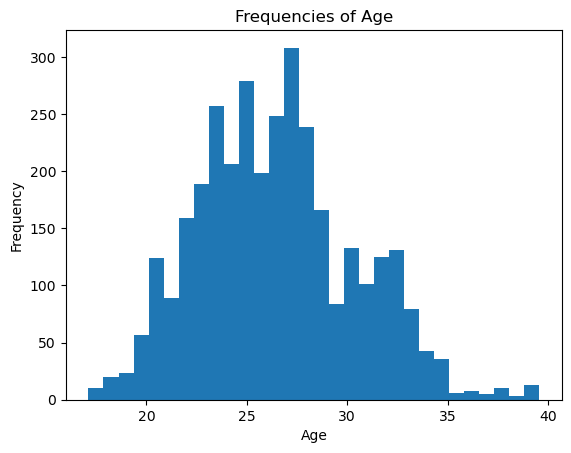

In [87]:
x_axis = 'Age'

plt.hist(df[x_axis], bins=30)
plt.ylabel("Frequency")
plt.xlabel(x_axis)
plt.title(f"Frequencies of {x_axis}")
plt.show()

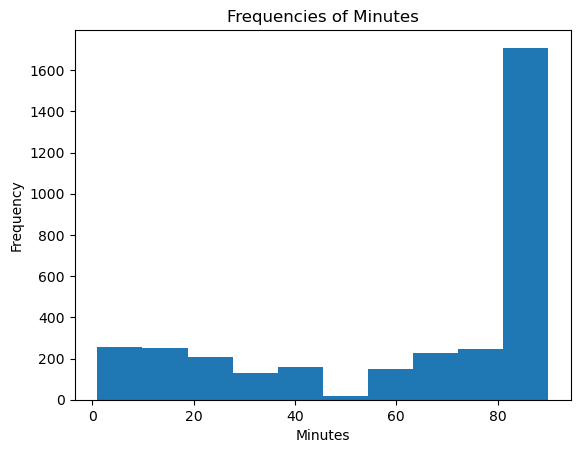

In [88]:
x_axis = 'Minutes'

plt.hist(df[x_axis])
plt.ylabel("Frequency")
plt.xlabel(x_axis)
plt.title(f"Frequencies of {x_axis}")
plt.show()

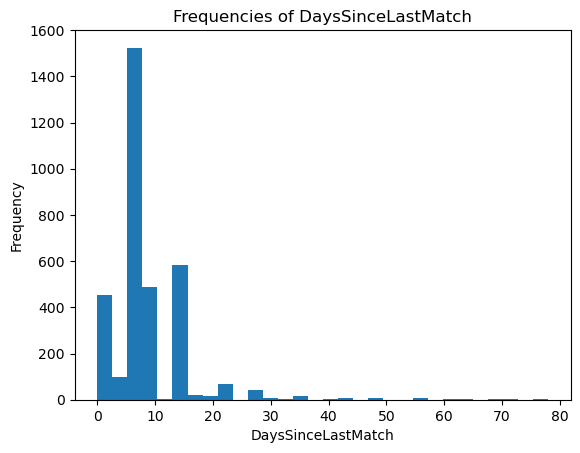

In [89]:
x_axis = 'DaysSinceLastMatch'

plt.hist(df[x_axis], bins=30)
plt.ylabel("Frequency")
plt.xlabel(x_axis)
plt.title(f"Frequencies of {x_axis}")
plt.show()

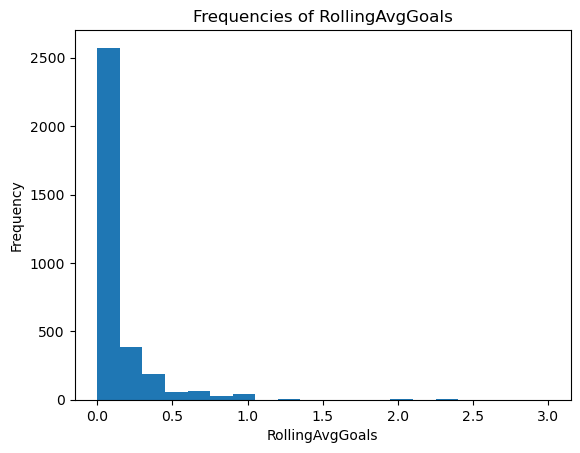

In [90]:
x_axis = 'RollingAvgGoals'

plt.hist(df[x_axis], bins=20)
plt.ylabel("Frequency")
plt.xlabel(x_axis)
plt.title(f"Frequencies of {x_axis}")
plt.show()

In [91]:
df.columns

Index(['Player', 'Team', '#', 'Nation', 'Position', 'Minutes', 'Goals',
       'Assists', 'Penalty Shoot on Goal', 'Penalty Shoot', 'Total Shoot',
       'Shoot on Target', 'Yellow Cards', 'Red Cards', 'Touches', 'Dribbles',
       'Tackles', 'Blocks', 'Expected Goals (xG)', 'Non-Penalty xG (npxG)',
       'Expected Assists (xAG)', 'Shot-Creating Actions',
       'Goal-Creating Actions', 'Passes Completed', 'Passes Attempted',
       'Pass Completion %', 'Progressive Passes', 'Carries',
       'Progressive Carries', 'Dribble Attempts', 'Successful Dribbles',
       'Date', 'Age', 'TeamShots', 'TeamxG', 'TeamPassAccuracy',
       'TeamDribbles', 'TeamProgression', 'DaysSinceLastMatch',
       'RollingAvgGoals'],
      dtype='object')

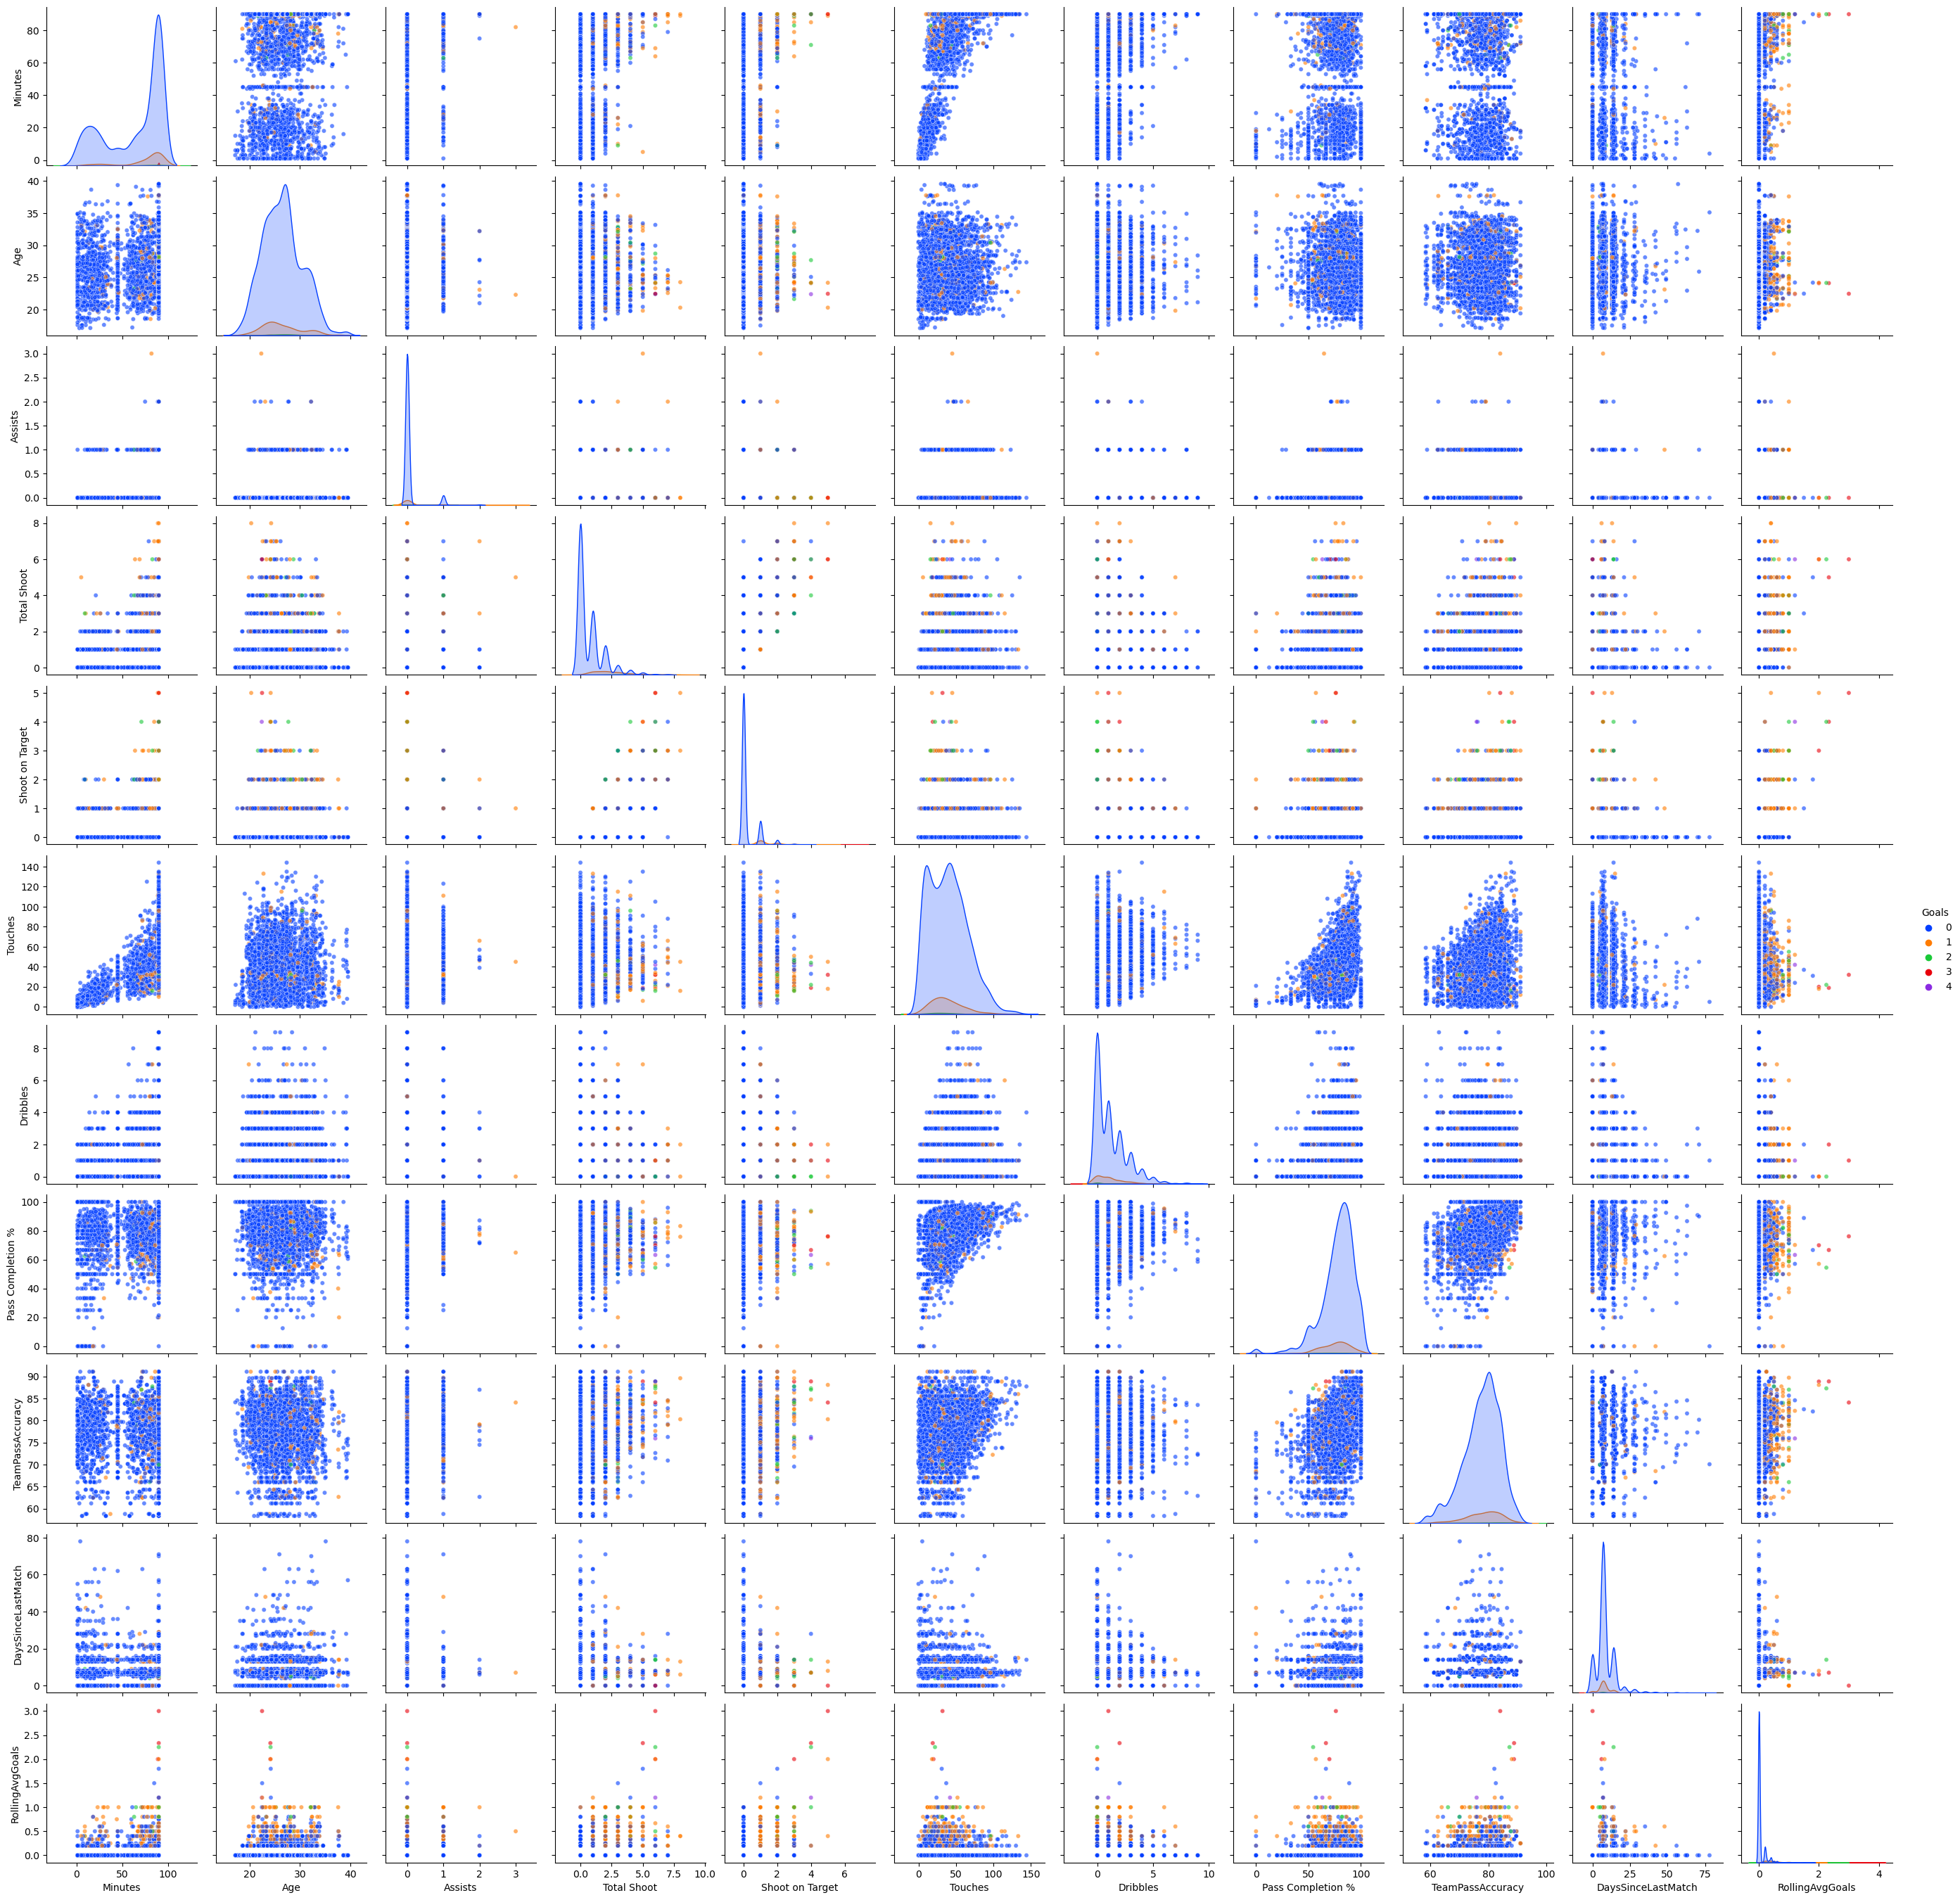

In [92]:
selected_cols = ["Minutes", "Age", "Assists", "Total Shoot", "Shoot on Target", "Touches", "Dribbles", "Pass Completion %", "TeamPassAccuracy", "DaysSinceLastMatch", "RollingAvgGoals"]

pairplot = sns.pairplot(pd.concat([df[selected_cols], y], axis=1), hue="Goals", palette="bright", diag_kind="kde", plot_kws={'alpha':0.6, 's':20})
pairplot.savefig("pair_plot.png", format="png", dpi=300)

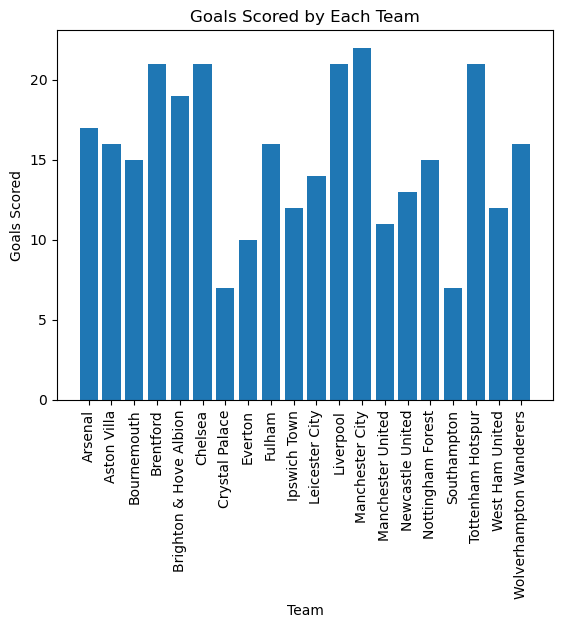

In [93]:
teams = pd.DataFrame(df.groupby("Team"))[0].values
data_by_team = pd.DataFrame(df.groupby("Team"))[1]
goals_per_team = []
for i, team_data in enumerate(data_by_team):
    goals_per_team.append(sum(team_data["Goals"]))

plt.bar(teams, goals_per_team)
plt.title("Goals Scored by Each Team")
plt.xlabel("Team")
plt.ylabel("Goals Scored")
plt.xticks(rotation=90)
plt.show()

### Encode categorical data: 
- Team

In [94]:
# Label encode the "Team" column
df['Team'], team_mapping = pd.factorize(df['Team'])

# Display the mapping of teams to integers
team_mapping = pd.Series(team_mapping, name="Team")

# Check the results
team_mapping

0             West Ham United
1                 Southampton
2                     Everton
3              Leicester City
4                 Bournemouth
5      Brighton & Hove Albion
6              Crystal Palace
7                      Fulham
8           Manchester United
9            Newcastle United
10                  Liverpool
11               Ipswich Town
12                Aston Villa
13    Wolverhampton Wanderers
14          Nottingham Forest
15          Tottenham Hotspur
16                    Chelsea
17                  Brentford
18                    Arsenal
19            Manchester City
Name: Team, dtype: object